In [1]:
# Приоритет
# инсайты для категорий:
# 1) по выручке:
# a) просуммировать выручку каждой категории за месяц, и сделать из них пайчарт
#   ПРОБЛЕМА: он не будет строить график по месяцам, тк в за ось игрек будут отвечать несколько столбцов
#   На одной оси дб числа по выручке, а с другой стороны - месяц
#   Если пойму как это делать, то с темпами роста проблем не будет, надо только брать медиану
# b) по каждой категории просуммировать выручку и посмотреть динамику по месяцам
# 
# 2) По темпам роста:
# a) посмотреть темпы роста всей индустрии за месяц и посмотреть динамику за несколько месяцев ( исключить выбросы с 100500%)
#
# изменить тип даты
#
#Соединить айос и андройд
#

In [1]:
# Установим вспомогательные пакеты
!pip install plotly-express
!pip install nbformat==4.2.0

In [2]:
import pandas as pd
import numpy as np
import pickle

# Модули для визуализации
import matplotlib.pyplot as plt
%matplotlib inline
# %matplotlib notebook
import seaborn as sns
import plotly
import plotly_express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

%config InlineBackend.figure_format = 'svg' # Графики в svg выглядят четче

# Увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 10, 10

import warnings
warnings.filterwarnings('ignore')

In [138]:
df = pd.read_excel("C:\\Users\\svzab\\OneDrive\\Desktop\\App_Annie\Jun_H&F_iOS.xlsx", header=5)

In [27]:
#https://stackoverflow.com/questions/55715774/time-data-doesnt-match-format-specified
# либо заменить на тире, либо как-то по-другому. ему мешает вот это "~"
df["Period"].replace(to_replace='~',value='-')
df['Period'] = pd.to_datetime(df['Period'], format = '%Y-%m-%d~%Y-%m-%d')
df['Period'] = pd.to_datetime(df['Period'], format = '%Y-%m-%d')

error: redefinition of group name 'Y' as group 4; was group 1 at position 89

In [139]:
# оставляем только топ по выручке
df_app = df[df['Unit'] == 'USD'].copy()
df_app = df_app.reset_index(drop=True)
df_app.rename(columns = {'Value':'Revenue','Change (Value)':'Change (Revenue)','Store':'Platform'}, inplace = True)

#исправляем тип даты
df_app["Change (%)"] = df_app["Change (%)"].str.strip("%")
df_app["Change (%)"] = df_app["Change (%)"].astype("float64")
df_app["Change (%)"]

#удаляем ненужные столбцы
del df_app['Parent Company ID']
del df_app['Type']
del df_app['Company ID']
del df_app['Version']
del df_app['Country']
del df_app['Device']
del df_app['Publisher ID']
del df_app['Company Name']
del df_app['App Franchise']
del df_app['Value Type']
del df_app['App IAP']
del df_app['App Franchise ID']
del df_app['Publisher Name']
del df_app['App Category']
del df_app['Is Unified']

df_app

,Rank,Category,Platform,Period,App ID,App Name,Revenue,Change (%),Change (Rank),Change (Revenue),Unit,AppURL,Star Rating,Ratings,App Release Date,Last Update,Parent Company Name,HQ Country
0,1,Health and Fitness,iOS,2020-06-01~2020-06-30,1.000600e+15,Weight Watchers Mobile,1401735.0,18.17,1.0,215497.0,USD,http://www.appannie.com/apps/all-stores/app/10...,4.7,1416825,2009-09-19,2020-08-19,Weight Watchers,United States
1,2,Health and Fitness,iOS,2020-06-01~2020-06-30,1.000600e+15,Calm,1325159.0,4.25,-1.0,54009.0,USD,http://www.appannie.com/apps/all-stores/app/10...,4.8,997349,2013-02-22,2020-08-13,Calm,United States
2,3,Health and Fitness,iOS,2020-06-01~2020-06-30,1.000600e+15,MyFitnessPal,1293642.0,16.59,0.0,184116.0,USD,http://www.appannie.com/apps/all-stores/app/10...,4.7,1584295,2009-12-08,2020-08-17,Under Armour,United States
3,4,Health and Fitness,iOS,2020-06-01~2020-06-30,1.000600e+15,Headspace,962328.0,8.53,0.0,75619.0,USD,http://www.appannie.com/apps/all-stores/app/10...,4.9,737578,2012-02-02,2020-08-20,Headspace,United States
4,5,Health and Fitness,iOS,2020-06-01~2020-06-30,1.000600e+15,Sweat with Kayla,892034.0,4.56,0.0,38907.0,USD,http://www.appannie.com/apps/all-stores/app/10...,4.4,32426,2015-11-20,2020-08-19,Kayla Itsines,Australia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Health and Fitness,iOS,2020-06-01~2020-06-30,1.457976e+09,Skridt Tæller - Pedometer,607.0,24.90,NaN,121.0,USD,http://www.appannie.com/apps/ios/app/1457975722/,4.4,75,2019-05-28,2020-08-21,MushTrip s.r.o.,NaN
996,997,Health and Fitness,iOS,2020-06-01~2020-06-30,1.478669e+09,iWill: Female Workout&Fitness,606.0,-39.82,-153.0,-401.0,USD,http://www.appannie.com/apps/ios/app/1478668555/,4.9,37,2020-02-07,2020-08-21,FITNESS AND HEALTH SOLUTIONS LIMITED,NaN
997,998,Health and Fitness,iOS,2020-06-01~2020-06-30,1.228727e+09,Craving To Quit!,606.0,-15.60,-61.0,-112.0,USD,http://www.appannie.com/apps/ios/app/1228727218/,4.6,88,2017-05-25,2020-08-21,Claritas MindSciences,NaN
998,999,Health and Fitness,iOS,2020-06-01~2020-06-30,1.356446e+09,PHIT APP,604.0,-10.91,-48.0,-74.0,USD,http://www.appannie.com/apps/ios/app/1356446122/,3.9,27,2018-03-09,2020-08-21,PHIT APP LLC,NaN


In [9]:
#за какой период данные ИСПРАВИТЬ!!!
print("Дни с {} по {}, всего {} дней.".format(min(df_app['Period']), 
                                          max(df_app['Period']), 
                                          df_app['Period'].nunique()))
print('В топе по выручке {} приложений.'.format(len(df_app)))

Дни с 2020-05-01~2020-05-31 по 2020-05-01~2020-05-31, всего 1 дней.
В топе по выручке 1000 приложений.


In [140]:
df_pivot = df_app.copy()

del df_pivot['App ID']
del df_pivot['Period']
del df_pivot['Unit']
del df_pivot['AppURL']
del df_pivot['Star Rating']
del df_pivot['Ratings']
del df_pivot['App Release Date']
del df_pivot['Last Update']
del df_pivot['HQ Country']
del df_pivot['Rank']
del df_pivot['Change (Rank)']
df_pivot = df_pivot[["App Name","Category","Parent Company Name", "Revenue", "Change (%)", "Change (Revenue)"]]

# удаляем корпорации, в приложения которых точно нельзя инвестировать
holdings = ["Netflix", "AT&T", "Rakuten", "Sony", "Amazon", "Disney", "Discovery, Inc.", "Tencent", "Disney", "Warner Media",
           "Viacom","ByteDance", "Coursera", "Course Hero","Microsoft","Google", "NY Times", "Bloomberg", "The Guardian", 
           "The Economist", "Mozilla", "GoPro", "Adobe", "Apple", "NBA", "MLB Advanced Media", "IBM"]
indexes = df_pivot[df_pivot["Parent Company Name"].isin(holdings)].index
df_pivot.drop(indexes, inplace = True)

# не получается удалить трешовые приложения !!!!!
trash = ["Wallpaper","wallpaper","Wallpapers","wallpapers","Wallpaper"]
indices = df_pivot[df_pivot["App Name"].isin(trash)].index
df_pivot.drop(indices, inplace = True)

df_pivot = df_pivot.reset_index(drop=True)
print(df_pivot.shape)
df_pivot


(999, 6)


,App Name,Category,Parent Company Name,Revenue,Change (%),Change (Revenue)
0,Weight Watchers Mobile,Health and Fitness,Weight Watchers,1401735.0,18.17,215497.0
1,Calm,Health and Fitness,Calm,1325159.0,4.25,54009.0
2,MyFitnessPal,Health and Fitness,Under Armour,1293642.0,16.59,184116.0
3,Headspace,Health and Fitness,Headspace,962328.0,8.53,75619.0
4,Sweat with Kayla,Health and Fitness,Kayla Itsines,892034.0,4.56,38907.0
...,...,...,...,...,...,...
994,Skridt Tæller - Pedometer,Health and Fitness,MushTrip s.r.o.,607.0,24.90,121.0
995,iWill: Female Workout&Fitness,Health and Fitness,FITNESS AND HEALTH SOLUTIONS LIMITED,606.0,-39.82,-401.0
996,Craving To Quit!,Health and Fitness,Claritas MindSciences,606.0,-15.60,-112.0
997,PHIT APP,Health and Fitness,PHIT APP LLC,604.0,-10.91,-74.0


In [141]:
df_pivot["Change (%)"].median()

-2.76

In [12]:
new_df = pd.DataFrame({'Category':[], 'Jul': []})
new_df

,Category,Jul


In [37]:
df_helper = pd.DataFrame({'Category':[df_pivot.Category[1]], 'Jul': [df_pivot["Revenue"].sum()]})
new_df = new_df.append(df_helper,ignore_index = True)
new_df

,Category,Jul,Jun
0,Weather,2842996.0,2842996.0
1,Business,10871151.0,NaN
2,Education,30343266.0,NaN
3,Entertainment,27886481.0,NaN
4,Finance,3125151.0,NaN
5,Food and Drink,564976.0,NaN


In [86]:
# это уже для  другого месяца
category = df.Category[0]
new_df.loc[new_df.Category == category, 'Jun'] = df_pivot["Revenue"].sum()
new_df

,Category,Jul,Jun
0,Weather,3329563.0,2842996.0
1,Business,10871151.0,10386735.0
2,Education,30343266.0,28972988.0
3,Entertainment,27886481.0,24494061.0
4,Finance,3125151.0,2832160.0
5,Food and Drink,564976.0,555381.0


In [87]:
new_df

,Category,Jul,Jun
0,Weather,3329563.0,2842996.0
1,Business,10871151.0,10386735.0
2,Education,30343266.0,28972988.0
3,Entertainment,27886481.0,24494061.0
4,Finance,3125151.0,2832160.0
5,Food and Drink,564976.0,555381.0


In [248]:
df_pivot["Revenue"].sum()

10386735.0

In [94]:
#делаем словарь
new_df = new_df.to_dict('list')


AttributeError: 'dict' object has no attribute 'to_dict'

In [95]:
new_df

{'Category': ['Weather',
  'Business',
  'Education',
  'Entertainment',
  'Finance',
  'Food and Drink'],
 'Jul': [3329563.0, 10871151.0, 30343266.0, 27886481.0, 3125151.0, 564976.0],
 'Jun': [2842996.0, 10386735.0, 28972988.0, 24494061.0, 2832160.0, 555381.0]}

ValueError: x and y must have same first dimension, but have shapes (100,) and (2,)

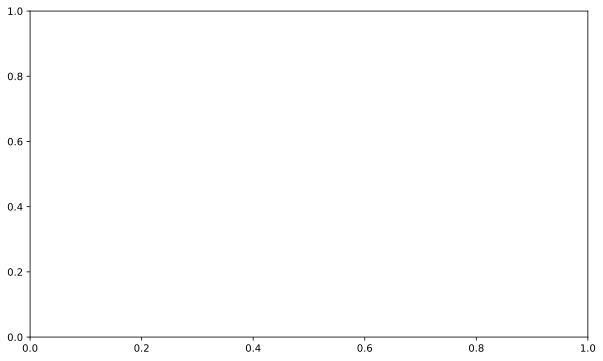

In [96]:
indexes = np.array(['Jun', 'Jul'])
x = np.linspace(0, 2, 100)
fig, ax = plt.subplots(figsize=(10, 6))
for i, v in enumerate(new_df['Category']):
    ax.plot(x, [new_df['Jun'][i], new_df['Jul'][i]], label = new_df['Category'][i])
ax.plot(x, label= new_df, lw=2)
plt.ylabel('богатство')
plt.xlabel('Номер посещения казино')
ax.legend();
fig, ax = plt.subplots(figsize=(10, 6))

#for i, v in enumerate(indexes):    
#    ax.plot(x, atos[v], label="{}".format(i), lw=1.2)
#ax.plot(x, atos_aver, label='среднее', lw=2)

ValueError: x and y must have same first dimension, but have shapes (100,) and (2,)

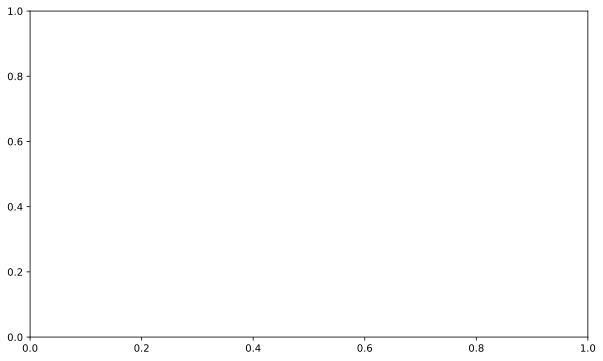

In [125]:
np.array(list(new_df.values()))
indexes = np.array(['Jun', 'Jul'])
x = np.linspace(0, 2, 100)
fig, ax = plt.subplots(figsize=(10, 6))
for i, v in enumerate(new_df['Category']):
    ax.plot(x, [new_df['Jun'][i], new_df['Jul'][i]], label = new_df['Category'][i])
ax.plot(x, label= new_df, lw=2)
plt.ylabel('Оборот')
plt.xlabel('Месяц')
ax.legend();


#for i, v in enumerate(indexes):    
#    ax.plot(x, atos[v], label="{}".format(i), lw=1.2)
#ax.plot(x, atos_aver, label='среднее', lw=2)

In [108]:
dtype = dict(names = names, formats=formats)
array = np.array(list(new_df.items()), dtype=dtype)

NameError: name 'names' is not defined

In [111]:
array = np.fromiter(new_df.items(),dtype count=len(new_df))

TypeError: fromiter() missing required argument 'dtype' (pos 2)

In [120]:
np.array(list(new_df.values()))

array([['Weather', 'Business', 'Education', 'Entertainment', 'Finance',
        'Food and Drink'],
       ['3329563.0', '10871151.0', '30343266.0', '27886481.0',
        '3125151.0', '564976.0'],
       ['2842996.0', '10386735.0', '28972988.0', '24494061.0',
        '2832160.0', '555381.0']], dtype='<U14')

In [116]:
np.array(list(new_df.values()))

array([['Weather', 'Business', 'Education', 'Entertainment', 'Finance',
        'Food and Drink'],
       ['3329563.0', '10871151.0', '30343266.0', '27886481.0',
        '3125151.0', '564976.0'],
       ['2842996.0', '10386735.0', '28972988.0', '24494061.0',
        '2832160.0', '555381.0']], dtype='<U14')

ValueError: x and y must have same first dimension, but have shapes (1000,) and (1,)

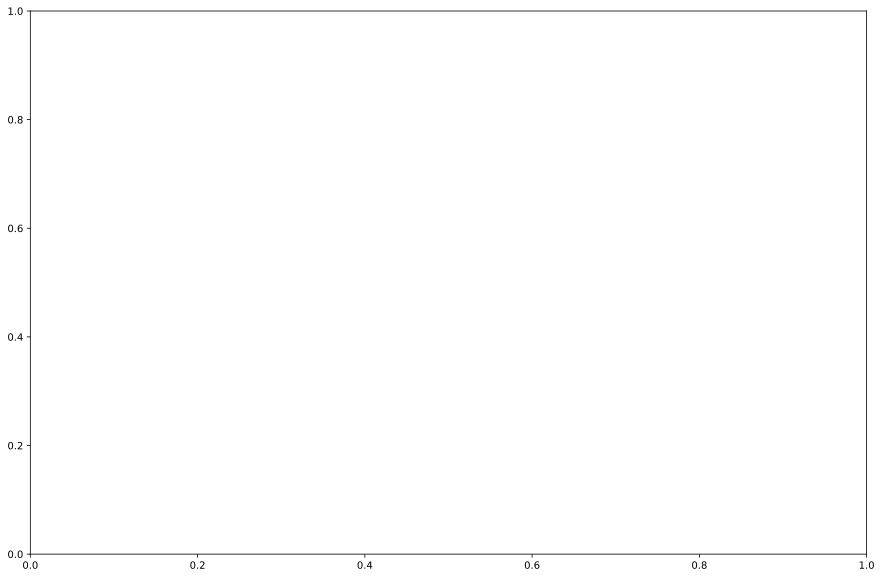

In [415]:
index = np.random.choice(range(0, 10000), 10)
x = np.linspace(0,1000, 1000)
fig, ax = plt.subplots(figsize=(15, 10))
for i in index:    
    ax.plot(x, new_df, label="{}".format(i), lw=1.2)
ax.plot(x, new_df, label='среднее', lw=2)
ax.set_ylim(900,1100)
ax.set_title("Арамис")
plt.ylabel('богатство')
plt.xlabel('Номер посещения казино')
ax.legend();

In [412]:
new_df.plt(xticks = new_df["Category"],yticks = new_df["Jun"])

AttributeError: 'dict' object has no attribute 'plt'

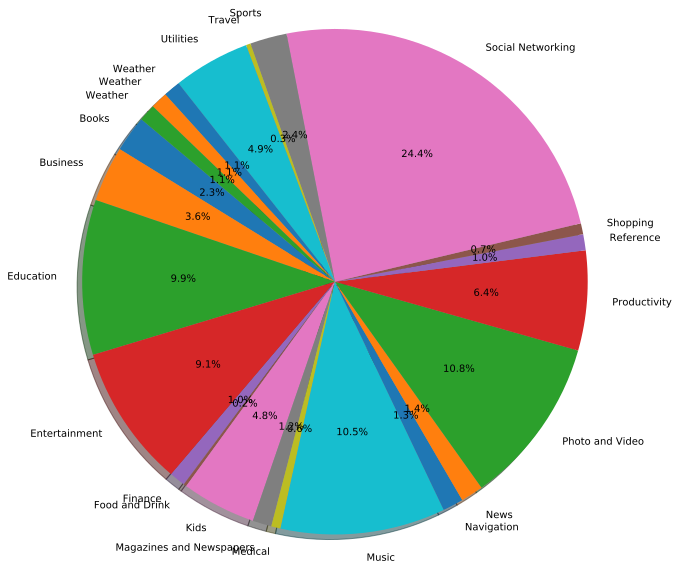

In [302]:

#labels = 'Python', 'C++', 'Ruby', 'Java'
#sizes = [215, 130, 245, 210]
#colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
#explode = (0.1, 0, 0, 0)  # explode 1st slice

# Plot
plt.pie(new_df.Jul, labels=new_df.Category,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

In [257]:
new_df = new_df.append(df_helper,ignore_index = True)
new_df

,Category,Jul
0,Books,7114998.0
1,Business,10871151.0
2,Education,30343266.0
3,Entertainment,27886481.0
4,Finance,3125151.0
5,Food and Drink,564976.0
6,Kids,14550433.0
7,Magazines and Newspapers,3706143.0
8,Medical,1826626.0
9,Music,32261707.0


In [336]:
new_df.drop(new_df.tail(1).index,inplace=True)

In [439]:
new_df = new_df1
new_df

,Category,Jul,Jun
0,Books,7114998.0,6406677.0
1,Business,10871151.0,10386735.0
2,Education,30343266.0,28972988.0
3,Entertainment,27886481.0,24494061.0
4,Finance,3125151.0,2832160.0
5,Food and Drink,564976.0,555381.0
6,Kids,14550433.0,13324859.0
7,Magazines and Newspapers,3706143.0,3519219.0
8,Medical,1826626.0,1749392.0
9,Music,32261707.0,30913995.0


In [142]:
# квантили
print(df_pivot["Change (%)"].quantile([.1, .2, .3, .4, .5, .6, .7, .8,.9]))
quant_70 = df_pivot["Change (%)"].quantile(.7)
quant_80 = df_pivot["Change (%)"].quantile(.8)
quant_90 = df_pivot["Change (%)"].quantile(.9)
print(df_pivot["Revenue"].quantile([.1, .2, .3, .4, .5, .6, .7, .8,.9]))
#исходя из этого стоит и выставлять значения для фильтра

0.1   -34.02
0.2   -22.90
0.3   -15.61
0.4    -8.65
0.5    -2.76
0.6     4.25
0.7    13.01
0.8    33.28
0.9    84.47
Name: Change (%), dtype: float64
0.1      861.6
0.2     1145.2
0.3     1575.8
0.4     2503.2
0.5     3822.0
0.6     6679.2
0.7    13218.6
0.8    27141.8
0.9    78710.8
Name: Revenue, dtype: float64


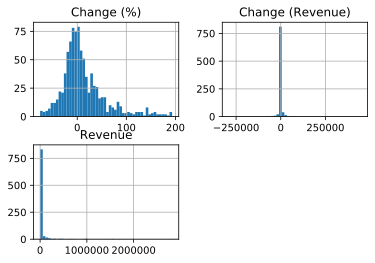

In [17]:
df_pivot[df_pivot["Change (%)"] < 200].hist(bins=50)
plt.show()

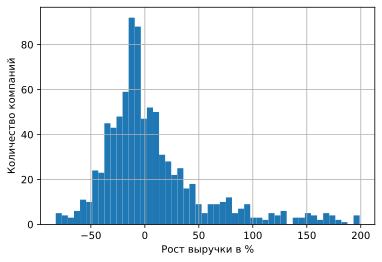

In [248]:
dfff = df_pivot[(df_pivot["Change (%)"] < 200)].copy()
ax = dfff["Change (%)"].hist(bins=50)
ax.set_ylabel("Количество компаний")
ax.set_xlabel("Рост выручки в %")
plt.show()

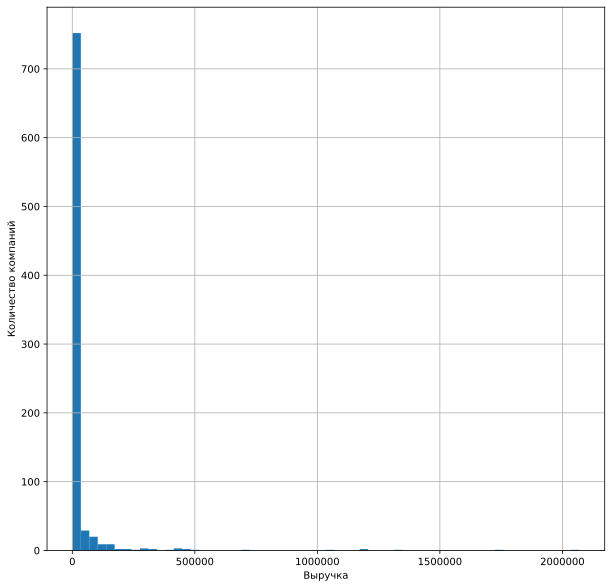

In [30]:
ax = dfff["Revenue"].hist(bins=60)
ax.set_ylabel("Количество компаний")
ax.set_xlabel("Выручка")
plt.show()

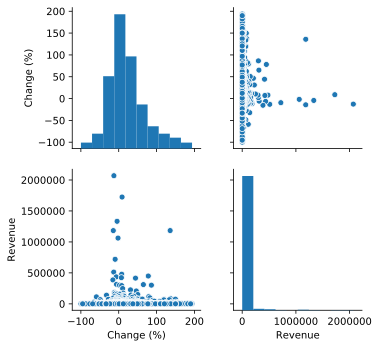

In [26]:
sns_plot = sns.pairplot(dfff[['Change (%)', 'Revenue']])
plt.show()

In [11]:
# сортировка по выручке ( вручную ) и темпам роста выручки ( по квантилям ) 
df_pivot = df_pivot[((df_pivot['Revenue']>= 3000) & (df_pivot['Revenue']< 5000)) & (df_pivot['Change (%)']>=quant_80) | 
                     (df_pivot['Revenue']>= 5000) & (df_pivot['Revenue'] < 10000) & (df_pivot['Change (%)']>=quant_70)|
                     (df_pivot['Revenue']>= 10000)                                                                     | 
                     (df_pivot['Revenue']>= 1000) & (df_pivot['Change (%)']>=quant_90)].copy()
print(df_pivot.shape)
df_pivot.sort_values('Revenue', ascending=False).tail(60)

(34, 6)


,App Name,Category,Parent Company Name,Revenue,Change (%),Change (Revenue)
0,Mealime,Food and Drink,Mealime Meal Plans,46818.0,-3.19,-1541.0
1,Keto & Ketogenic diet recipes,Food and Drink,Drama Labs,26391.0,-5.89,-1653.0
2,eMeals,Food and Drink,eMeals,24990.0,-6.98,-1874.0
3,下厨房,Food and Drink,Xiachufang.com,17184.0,216.87,11761.0
4,Paprika Recipe Manager,Food and Drink,Hindsight,16453.0,-8.21,-1471.0
5,Forks Over Knives,Food and Drink,Forks Over Knives,13349.0,-2.65,-364.0
6,Deliciously Ella App,Food and Drink,Eleanor Woodward,10812.0,177.73,6919.0
7,Yummly,Food and Drink,Whirlpool,10649.0,-3.37,-371.0
8,Vegan Pocket - Is it Vegan?,Food and Drink,Vegan Pocket,10272.0,32.12,2497.0
9,Wine Spectator WineRatings,Food and Drink,M Shanken,9913.0,0.21,21.0


In [294]:
#сохранение
df_pivot.to_excel("Food and Drink_Jul.xlsx")

In [ ]:
# суммируем выручку 
ax = df_pivot[['ConfirmedCases', 'Fatalities', 'Date']].groupby('Date').sum().plot(title='Заголовок')
ax.set_xlabel("Название оси X")
ax.set_ylabel("Название оси Y");

In [14]:
df_pivot["Revenue"].sum()

564976.0

In [36]:
new_df = pd.DataFrame(columns = ['Category', 'Jul'])
new_df["Category"] = df_pivot.Category.unique()
new_df["Jul"] = df_pivot["Revenue"].sum()
new_df.copy(deep = True)

,Category,Jul
0,Education,30343266.0


In [91]:
df_pivot[(df_pivot['Revenue']>= 8000) & (df_pivot['Change (%)']>200)]

,App Name,Category,Parent Company Name,Revenue,Change (%),Change (Revenue)
7,Toca Hair Salon 4,Kids,Spin Master,304772.0,244.41,216280.0
19,Kindergarten Educational Games,Kids,Genesis Media,104463.0,219.11,71727.0
20,Toca Hair Salon 3,Kids,Spin Master,97328.0,219.03,66821.0
36,Keiki ABC Kids Learning Games,Kids,Genesis Media,42652.0,796.62,37895.0
95,Toca Hair Salon 2,Kids,Spin Master,16876.0,575.58,14378.0


In [ ]:
# что сделать:
# проверить Change (Revenue) - Все ОК, тут отражается изменение за месяц, все правильно
# попробовать соединить IOS и андроид( сложно)
# Изменить дату  и апдейт
# найти баланс между тоталом по выручке и росту в процентах


In [71]:
df_app.Revenue[100:150]

,Rank,Category,Platform,Period,App ID,App Name,Revenue,Change (%),Change (Rank),Change (Revenue),Unit,AppURL,Star Rating,Ratings,App Release Date,Last Update,Parent Company Name,HQ Country
0,1,Entertainment,iOS,2020-05-01~2020-05-31,1.000600e+15,Disney+,17594015.0,-0.43,0.0,-76712.0,USD,http://www.appannie.com/apps/all-stores/app/10...,4.5,133060,2019-03-25,2020-07-27,Disney,United States
1,2,Entertainment,iOS,2020-05-01~2020-05-31,1.000600e+15,Netflix,12377472.0,-4.48,0.0,-580533.0,USD,http://www.appannie.com/apps/all-stores/app/10...,3.6,540140,2010-04-01,2020-07-28,Netflix,United States
2,3,Entertainment,iOS,2020-05-01~2020-05-31,1.000600e+15,Hulu,7822204.0,11.37,0.0,798393.0,USD,http://www.appannie.com/apps/all-stores/app/10...,4.6,1235541,2010-06-29,2020-07-29,Disney,United States
3,4,Entertainment,iOS,2020-05-01~2020-05-31,1.000600e+15,HBO Max,3980161.0,-0.42,1.0,-16942.0,USD,http://www.appannie.com/apps/all-stores/app/10...,3.1,6399,2015-04-07,2020-07-27,Warner Media,United States
4,5,Entertainment,iOS,2020-05-01~2020-05-31,1.000600e+15,TikTok,3920302.0,-8.54,-1.0,-366284.0,USD,http://www.appannie.com/apps/all-stores/app/10...,4.7,6059688,2014-04-02,2020-07-30,ByteDance,China
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Entertainment,iOS,2020-05-01~2020-05-31,1.434195e+09,Daily Decision Wheel,295.0,4.24,NaN,12.0,USD,http://www.appannie.com/apps/ios/app/1434195334/,4.6,2745,2018-09-26,2020-07-31,Vladimir Roganov,NaN
996,997,Entertainment,iOS,2020-05-01~2020-05-31,1.225190e+09,Truth Or Dare : Party Game,293.0,876.67,NaN,263.0,USD,http://www.appannie.com/apps/ios/app/1225189596/,4.7,17727,2017-05-01,2020-07-31,DH3 Games,NaN
997,998,Entertainment,iOS,2020-05-01~2020-05-31,1.455068e+09,VIBE Aesthetic Wallpaper 4K,292.0,-18.21,-64.0,-65.0,USD,http://www.appannie.com/apps/ios/app/1455068369/,4.6,739,2019-03-22,2020-07-31,Apalto,Russia
998,999,Entertainment,iOS,2020-05-01~2020-05-31,1.000600e+15,XLR8,291.0,17.34,NaN,43.0,USD,http://www.appannie.com/apps/all-stores/app/10...,2.6,253,2012-04-06,2017-09-23,2XL Games,United States


In [96]:
# Google Play
df2 = pd.read_excel("C:\\Users\\svzab\\OneDrive\\Desktop\\App_Annie_Ent_May_GP.xlsx")
# оставляем только топ по выручке
df_app_2 = df2[df2['Unit'] == 'USD'].copy()
df_app_2 = df_app_2.reset_index(drop=True)
df_app_2.rename(columns = {'Value':'Revenue','Change (Value)':'Change (Revenue)','Store':'Platform'}, inplace = True)
df_app_2

,Rank,Category,Platform,Device,Type,Country,Period,Version,App ID,App Name,...,Last Update,Publisher ID,Publisher Name,Company Name,Parent Company Name,App Franchise,App Franchise ID,Company ID,Parent Company ID,HQ Country
0,1,Entertainment,Google Play,All,Grossing,United States,2020-05-01~2020-05-31,Web,1.000600e+15,Disney+,...,2020-07-21,NaN,NaN,Disney,Disney,NaN,NaN,1.000200e+15,1.000200e+15,United States
1,2,Entertainment,Google Play,All,Grossing,United States,2020-05-01~2020-05-31,Web,1.000600e+15,Twitch,...,2020-07-23,NaN,NaN,Twitch Interactive,Amazon,NaN,NaN,1.000200e+15,1.000200e+15,United States
2,3,Entertainment,Google Play,All,Grossing,United States,2020-05-01~2020-05-31,Web,1.000600e+15,HBO Max,...,2020-07-23,NaN,NaN,Warner Media,Warner Media,NaN,NaN,1.000200e+15,1.000200e+15,United States
3,4,Entertainment,Google Play,All,Grossing,United States,2020-05-01~2020-05-31,Web,1.000600e+15,STARZ,...,2020-07-29,NaN,NaN,Starz Entertainment,Starz Entertainment,NaN,NaN,1.000200e+15,1.000200e+15,United States
4,5,Entertainment,Google Play,All,Grossing,United States,2020-05-01~2020-05-31,Web,1.000600e+15,CBS,...,2020-07-27,NaN,NaN,CBS Interactive,CBS Corporation,NaN,NaN,1.000200e+15,1.000200e+15,United States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
743,744,Entertainment,Google Play,Google Play,Grossing,United States,2020-05-01~2020-05-31,Web,2.060001e+13,CHOEAEDOL Celeb – Korean Star Ranks,...,2020-07-25,2.020000e+13,ExodusEnt.,Exodus,Exodus,CHOEAEDOL Celeb – Korean Star Ranks,NaN,1.000200e+15,1.000200e+15,South Korea
744,745,Entertainment,Google Play,Google Play,Grossing,United States,2020-05-01~2020-05-31,Web,2.060001e+13,Mahar,...,2020-04-15,2.020000e+13,ABC Content Solutions,ABC Content Solutions,ABC Content Solutions,Mahar,NaN,NaN,NaN,NaN
745,746,Entertainment,Google Play,Google Play,Grossing,United States,2020-05-01~2020-05-31,Web,2.060000e+13,CritDice - Dice Roller,...,2020-04-20,2.020000e+13,VueSoft LLC,VueSoft LLC,VueSoft LLC,CritDice - Dice Roller,NaN,NaN,NaN,NaN
746,747,Entertainment,Google Play,Google Play,Grossing,United States,2020-05-01~2020-05-31,Web,2.060000e+13,Ultimate EMF Detector Pro,...,2020-04-15,2.020000e+13,MRE Programming,MRE Programming,MRE Programming,Ultimate EMF Detector Pro,NaN,NaN,NaN,NaN


In [89]:
df_app_2.describe()

,App ID,Revenue,Change (%),Change (Rank),Change (Revenue)
count,1.000000e+03,1.000000e+03,970.000000,877.000000,1000.000000
mean,3.672210e+14,8.002094e+04,149.156227,2.132269,4503.103000
std,4.825164e+14,7.569058e+05,1193.075241,111.413729,43725.181596
min,3.008977e+08,2.910000e+02,-93.850000,-533.000000,-580533.000000
25%,1.284188e+09,6.655000e+02,-9.765000,-35.000000,-154.500000
50%,1.476204e+09,1.880000e+03,8.665000,-4.000000,155.500000
75%,1.000600e+15,8.411500e+03,37.187500,30.000000,922.000000
max,1.000600e+15,1.759402e+07,27036.170000,741.000000,798393.000000


In [97]:
del df_app_2['Parent Company Name']
del df_app_2['Type']
del df_app_2['Company ID']
del df_app_2['Version']
del df_app_2['Country']
del df_app_2['Device']
del df_app_2['Publisher ID']
del df_app_2['Company Name']
del df_app_2['App Franchise']
del df_app_2['Value Type']
del df_app_2['App IAP']
del df_app_2['App Franchise ID']
del df_app_2['Publisher Name']
del df_app_2['App Category']
del df_app_2['Is Unified']

In [106]:
df_app_2.loc["App Name"] ="Twitch"

In [120]:
# как соединить айос и гп
# Идея: создать новый столбец для выручки и др
# запустить цикл, чтобы в гп искал названия приложений
# если название в гп совпадает с названием в айос, то в таблицу айос в новый столбец кладем новые данные
# потом делаем тотал по выручке
# если не находит, то оставляем ноль
# проблема в том, как этот цикл запустить и сделать так, чтобы он итерировал названия
#
#
#